# Recommenders Assignments

## 1. Content-Based Filtering: Cosine Similarity

In [1]:
# 1. Read in the data from the first tab of the Movie Ratings spreadsheet, which contains genre labels
import pandas as pd

df = pd.read_excel('../Data/Movie_Ratings.xlsx')
df.head()

,Movie_ID,Movie_Title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [2]:
# 2. Remove the non-genre columns of the movie genre data
movies = df.drop(columns=['Movie_ID']).set_index('Movie_Title')
movies


,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Movie_Title,,,,,,,,,,,,,,,,,,
Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mat' i syn (1997),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
B. Monkey (1998),0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
Sliding Doors (1998),0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [3]:
movies.index.name = None

In [4]:
movies.index

Index(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)',
       'Get Shorty (1995)', 'Copycat (1995)',
       'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
       'Twelve Monkeys (1995)', 'Babe (1995)', 'Dead Man Walking (1995)',
       'Richard III (1995)',
       ...
       'Mirage (1995)', 'Mamma Roma (1962)', 'Sunchaser, The (1996)',
       'War at Home, The (1996)', 'Sweet Nothing (1995)', 'Mat' i syn (1997)',
       'B. Monkey (1998)', 'Sliding Doors (1998)', 'You So Crazy (1994)',
       'Scream of Stone (Schrei aus Stein) (1991)'],
      dtype='object', length=1682)

In [5]:
# 3. Calculate the cosine similarity of Toy Story (1995) and Get Shorty (1995)
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(movies.loc[['Toy Story (1995)', 'Get Shorty (1995)']])

array([[1.        , 0.33333333],
       [0.33333333, 1.        ]])

In [6]:
# 4. Calculate the cosine similarity of Toy Story (1995) compared with all the movies
def get_similar_movies(df, movie_name):
    similarity_df = pd.DataFrame(cosine_similarity(df), index= df.index, columns = df.index)
    if movie_name not in similarity_df.index:
        return f'{movie_name} can not found'
    return similarity_df[[movie_name]].sort_values(by = movie_name, ascending =False)

In [7]:
get_similar_movies(movies, 'Toy Story (1995)')

,Toy Story (1995)
Toy Story (1995),1.000000
Aladdin and the King of Thieves (1996),1.000000
"Goofy Movie, A (1995)",0.866025
Aladdin (1992),0.866025
Home Alone (1990),0.816497
...,...
Rough Magic (1995),0.000000
Nothing Personal (1995),0.000000
Four Rooms (1995),0.000000
GoldenEye (1995),0.000000


In [8]:
# 5. Return the top 5 movies with the highest cosine similarity
get_similar_movies(movies, 'Toy Story (1995)')[:5]

,Toy Story (1995)
Toy Story (1995),1.000000
Aladdin and the King of Thieves (1996),1.000000
"Goofy Movie, A (1995)",0.866025
Aladdin (1992),0.866025
Home Alone (1990),0.816497


## 2. User-Item Matrix

In [9]:
# 1. Read in the movies, users and ratings tabs of the spreadsheet into three DataFrames
movies_df = df.copy() 

In [10]:
users = pd.read_excel('../Data/Movie_Ratings.xlsx', sheet_name=1)
users.head()

,User_ID,Age,Gender,Occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [11]:
ratings = pd.read_excel('../Data/Movie_Ratings.xlsx', sheet_name=2)
ratings.head()

,User_ID,Movie_ID,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [12]:
# 2. Use .pivot to restructure the ratings data into a user-item matrix
ratings.describe()

,User_ID,Movie_ID,Rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


In [13]:
X = (ratings.pivot(index= 'User_ID', columns = 'Movie_ID', values = 'Rating').fillna(3))
X

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
User_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
5,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
940,3.0,3.0,3.0,2.0,3.0,3.0,4.0,5.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
941,5.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


## 3. TruncatedSVD

In [14]:
# 1. Apply TruncatedSVD to the user-item matrix from the last assignment
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd.fit(X)

,n_components,2
,algorithm,'randomized'
,n_iter,5
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None
,tol,0.0


In [15]:
# 2. View the user-item matrix and the shape of the user-item matrix
print(X)
print(X.shape)

Movie_ID  1     2     3     4     5     6     7     8     9     10    ...  \
User_ID                                                               ...   
1          5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
2          4.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   2.0  ...   
3          3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0  ...   
4          3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0  ...   
5          4.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0  ...   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
939        3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   5.0   3.0  ...   
940        3.0   3.0   3.0   2.0   3.0   3.0   4.0   5.0   3.0   3.0  ...   
941        5.0   3.0   3.0   3.0   3.0   3.0   4.0   3.0   3.0   3.0  ...   
942        3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0  ...   
943        3.0   5.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0  ...   

In [16]:
# 3. View the U matrix and the shape of the U matrix
U = svd.transform(X)
print(U)
print(U.shape)

[[127.32561834   7.17302453]
 [124.14575385  -2.17386832]
 [122.72783502  -2.53302683]
 ...
 [123.59193451  -2.36153265]
 [125.55804029   1.71406295]
 [124.8229789    2.27927736]]
(943, 2)


In [17]:
U_df = pd.DataFrame(U, index = X.index)
U_df.head()

,0,1
User_ID,,
1,127.325618,7.173025
2,124.145754,-2.173868
3,122.727835,-2.533027
4,123.802128,-2.822312
5,122.566026,0.754480


In [18]:
# optional : view sigma

sigma = svd.singular_values_

print(sigma)
print(sigma.shape)

[3822.1590609   100.21021734]
(2,)


In [19]:
# 4. View the VT matrix and the shape of the VT matrix
VT = svd.components_

print(VT)

print(VT.shape)

[[ 0.02751476  0.02434468  0.02413305 ...  0.0240913   0.02409975
   0.02409975]
 [ 0.06807057  0.00836982 -0.00701513 ... -0.01008337 -0.01038316
  -0.01038316]]
(2, 1682)


In [20]:
VT_df = pd.DataFrame(VT, columns= X.columns)
VT_df.head()

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,0.027515,0.024345,0.024133,0.025100,0.024327,0.024231,0.026796,0.025988,0.026408,0.024741,...,0.024100,0.024109,0.024100,0.024091,0.024100,0.024083,0.024100,0.024091,0.024100,0.024100
1,0.068071,0.008370,-0.007015,0.051881,-0.004403,-0.009123,0.061829,0.073483,0.052806,0.007769,...,-0.010383,-0.009653,-0.010383,-0.010600,-0.010383,-0.009784,-0.010383,-0.010083,-0.010383,-0.010383


## 4. Choosing the Number of Components

In [21]:
# 1. Fit a TruncatedSVD model with 500 components
svd_500 = TruncatedSVD(n_components=500)
svd_500.fit(X)

,n_components,500
,algorithm,'randomized'
,n_iter,5
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None
,tol,0.0


In [22]:
# user item matrix

U = svd_500.transform(X)
U.shape

(943, 500)

In [25]:
# check the model's ability to explain the variance
sum(svd_500.explained_variance_ratio_)

np.float64(0.9739894959179816)

In [26]:
import numpy as np

In [27]:
np.cumsum(svd_500.explained_variance_ratio_)

array([0.02634224, 0.09670746, 0.13352313, 0.15416136, 0.17065872,
       0.18475289, 0.19777924, 0.20900164, 0.21951129, 0.22883465,
       0.23775293, 0.24629116, 0.25438713, 0.26208101, 0.26938786,
       0.27634992, 0.28309471, 0.28954257, 0.29586494, 0.30198666,
       0.30802005, 0.31399736, 0.31977399, 0.32542393, 0.33095914,
       0.33638744, 0.34165985, 0.34687784, 0.35205635, 0.35710688,
       0.36208493, 0.36695349, 0.37179452, 0.37654426, 0.38125827,
       0.38591203, 0.39044727, 0.39496603, 0.39942445, 0.4038044 ,
       0.40812137, 0.41241918, 0.41666596, 0.42085368, 0.42497366,
       0.42906911, 0.43311524, 0.43715268, 0.44111311, 0.44505179,
       0.4489614 , 0.45281315, 0.45661493, 0.46038516, 0.46412771,
       0.46782601, 0.47150916, 0.47518515, 0.47882461, 0.48241856,
       0.48596567, 0.48945063, 0.49292852, 0.49637678, 0.4997847 ,
       0.50315157, 0.50649217, 0.50980373, 0.51310791, 0.51639524,
       0.51964767, 0.52289302, 0.52608834, 0.52925411, 0.53240

In [28]:
cum_evr6 = list(zip(range(1, U.shape[1]+1), np.cumsum(svd_500.explained_variance_ratio_)))
cum_evr6

[(1, np.float64(0.026342243723370046)),
 (2, np.float64(0.09670746059197192)),
 (3, np.float64(0.13352313267970786)),
 (4, np.float64(0.15416135834298772)),
 (5, np.float64(0.17065872214204308)),
 (6, np.float64(0.18475289185595273)),
 (7, np.float64(0.1977792363226052)),
 (8, np.float64(0.2090016375876516)),
 (9, np.float64(0.2195112894931741)),
 (10, np.float64(0.22883464805499754)),
 (11, np.float64(0.23775293399909805)),
 (12, np.float64(0.24629115603506996)),
 (13, np.float64(0.25438713039454736)),
 (14, np.float64(0.26208101216967605)),
 (15, np.float64(0.2693878605688265)),
 (16, np.float64(0.27634992471945924)),
 (17, np.float64(0.2830947136284878)),
 (18, np.float64(0.28954257280168555)),
 (19, np.float64(0.2958649423330135)),
 (20, np.float64(0.30198666437571253)),
 (21, np.float64(0.3080200530653629)),
 (22, np.float64(0.31399735860734057)),
 (23, np.float64(0.319773986097072)),
 (24, np.float64(0.32542393271570563)),
 (25, np.float64(0.3309591350479495)),
 (26, np.float64(0

<Axes: title={'center': 'Number of Components vs Cumulative Explained Variance Ratio'}, xlabel='Components', ylabel='Cumulative Explained Variance Ratio'>

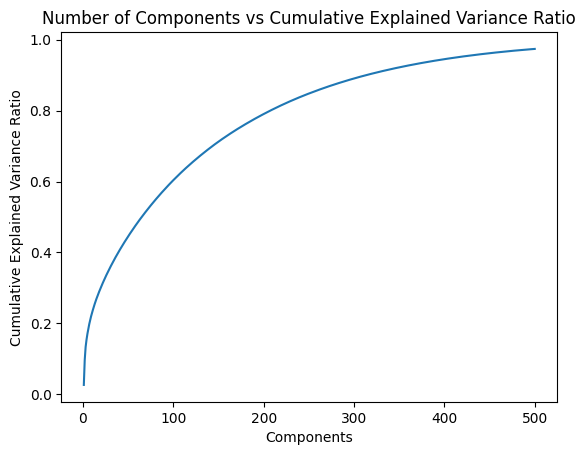

In [29]:
# 2. Plot the cumulative explained variance ratios
cum_evr6_df = pd.DataFrame(cum_evr6).set_index(0)
cum_evr6_df.plot(title='Number of Components vs Cumulative Explained Variance Ratio',
                xlabel='Components',
                ylabel='Cumulative Explained Variance Ratio',
                legend=False)

In [ ]:
# 3. Suggest a “good” number of components that best captures the info in the data set
# over 200

In [30]:
# 4. Fit another TruncatedSVD model with the “good” number of components
svd_250 = TruncatedSVD(n_components=250)
svd_250.fit(X)
U_250 = svd_250.transform(X)

In [33]:
U_250

array([[ 1.27325618e+02,  7.17303104e+00, -9.07460959e-01, ...,
        -9.52559368e-02,  9.79559802e-02, -3.70520373e-02],
       [ 1.24145754e+02, -2.17387196e+00, -5.31446191e-01, ...,
        -6.57401270e-02,  2.23300057e-01,  1.47723310e-01],
       [ 1.22727835e+02, -2.53302812e+00, -5.67465501e-01, ...,
        -3.44032220e-01,  2.89075388e-01,  4.54652035e-01],
       ...,
       [ 1.23591935e+02, -2.36152587e+00,  6.29930503e-01, ...,
        -1.54735604e-01, -2.40393325e-01, -3.34746267e-02],
       [ 1.25558040e+02,  1.71406568e+00,  7.84657126e-01, ...,
         2.43830330e-01,  1.99507876e-01, -5.31217690e-01],
       [ 1.24822979e+02,  2.27924561e+00,  1.97721376e+00, ...,
         4.63012614e-01,  2.80014249e-01,  7.26654740e-01]],
      shape=(943, 250))

In [32]:
svd_250.explained_variance_ratio_

array([0.02634224, 0.07036522, 0.03681567, 0.02063823, 0.01649736,
       0.01409417, 0.01302634, 0.0112224 , 0.01050965, 0.00932336,
       0.00891829, 0.00853822, 0.00809597, 0.00769388, 0.00730685,
       0.00696206, 0.00674479, 0.00644786, 0.00632237, 0.00612172,
       0.00603339, 0.00597731, 0.00577663, 0.00564995, 0.0055352 ,
       0.0054283 , 0.00527242, 0.00521799, 0.00517851, 0.00505053,
       0.00497805, 0.00486856, 0.00484103, 0.00474974, 0.00471401,
       0.00465376, 0.00453524, 0.00451875, 0.00445842, 0.00437995,
       0.00431697, 0.00429781, 0.00424678, 0.00418772, 0.00411998,
       0.00409545, 0.00404613, 0.00403744, 0.00396043, 0.00393868,
       0.00390961, 0.00385175, 0.00380178, 0.00377023, 0.00374255,
       0.00369829, 0.00368315, 0.003676  , 0.00363946, 0.00359394,
       0.00354711, 0.00348496, 0.00347789, 0.00344826, 0.00340791,
       0.00336686, 0.0033406 , 0.00331155, 0.00330418, 0.00328733,
       0.00325243, 0.00324535, 0.00319532, 0.00316577, 0.00315

## 5. Making Collaborative Filtering Recommendations

In [35]:
# 1. View the new user vector
import pandas as pd
import numpy as np

# read in the movies tab of the spreadsheet
movies = pd.read_excel('../Data/Movie_Ratings.xlsx')

# read in the ratings tab
ratings = pd.read_excel('../Data/Movie_Ratings.xlsx', sheet_name=2)

# use .pivot to restructure the ratings data into a user-item matrix
X = (ratings.pivot(index='User_ID', columns='Movie_ID', values='Rating').fillna(3))

# create a vector of NaN values
vector_length = X.shape[1]
new_user = np.full(vector_length, np.nan)

# populate with 5 ratings
ratings = [5, 3, 5, 5, 4]
positions_to_populate = [11, 14, 28, 63, 66]
new_user[positions_to_populate] = ratings

# view as a DataFrame
new_user_df = pd.DataFrame([new_user], columns=movies.Movie_Title)
new_user_df

Movie_Title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# view only the movies that the new user rated
new_user_df.T.dropna()

,0
Movie_Title,
"Usual Suspects, The (1995)",5.0
Mr. Holland's Opus (1995),3.0
Batman Forever (1995),5.0
"Shawshank Redemption, The (1994)",5.0
Ace Ventura: Pet Detective (1994),4.0


In [ ]:
# 2. Transform the user into the latent space using .transform()
new_user_250 = svd_250.transform(new_user_df.fillna(3))
new_user_250[0][:5]

c:\Users\ghummatova\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but TruncatedSVD was fitted without feature names
  warnings.warn(


array([ 1.23173718e+02, -2.50283200e+00, -1.16245959e-01, -1.52219138e-01,
       -2.28008930e-01])

In [41]:
# 3. Reconstruct the user-item matrix for the user using np.dot()
VT_250 = svd_250.components_
VT_250


array([[ 0.02751476,  0.02434468,  0.02413305, ...,  0.0240913 ,
         0.02409975,  0.02409975],
       [ 0.06807163,  0.00836968, -0.00701458, ..., -0.01008345,
        -0.01038323, -0.01038323],
       [ 0.0993642 ,  0.03973147,  0.02068481, ..., -0.00130473,
        -0.001206  , -0.001206  ],
       ...,
       [ 0.00133864, -0.01863726, -0.00697017, ...,  0.00020751,
        -0.00017149, -0.00017149],
       [-0.04389957, -0.03823336, -0.02254573, ...,  0.00048268,
        -0.00105468, -0.00105468],
       [ 0.04041426,  0.03212231, -0.0564813 , ...,  0.00334667,
         0.00038385,  0.00038385]], shape=(250, 1682))

In [42]:
new_user_recs = np.dot(new_user_250, VT_250)
new_user_recs

array([[3.02422286, 3.12465702, 3.08904911, ..., 3.0069759 , 3.00589521,
        3.00589521]], shape=(1, 1682))

In [45]:
# 4. Make 10 movie recommendations for the user
new_user_recs_df = pd.DataFrame(new_user_recs, columns =movies.Movie_Title)

In [51]:
top_recs = new_user_recs_df.T.sort_values(by = 0, ascending=False)
top_recs

,0
Movie_Title,
"Shawshank Redemption, The (1994)",4.518581
"Usual Suspects, The (1995)",4.441436
Batman Forever (1995),3.500794
Ace Ventura: Pet Detective (1994),3.336035
It's a Wonderful Life (1946),3.183861
...,...
Young Frankenstein (1974),2.869917
101 Dalmatians (1996),2.869493
"Lion King, The (1994)",2.867489


In [49]:
# remove already rated
already_rated = new_user_df.T.dropna().index
already_rated

Index(['Usual Suspects, The (1995)', 'Mr. Holland's Opus (1995)',
       'Batman Forever (1995)', 'Shawshank Redemption, The (1994)',
       'Ace Ventura: Pet Detective (1994)'],
      dtype='object', name='Movie_Title')

In [52]:
top_recs[~top_recs.index.isin(already_rated)]

,0
Movie_Title,
It's a Wonderful Life (1946),3.183861
Tommy Boy (1995),3.177942
Reservoir Dogs (1992),3.177842
Happy Gilmore (1996),3.170289
Speed (1994),3.170149
...,...
Young Frankenstein (1974),2.869917
101 Dalmatians (1996),2.869493
"Lion King, The (1994)",2.867489


In [21]:
# 5. Review the movies and determine if they make sense


In [22]:
# 6. Optional: Try playing around with the number of components to see the difference in movie recommendations
